See Engels https://arxiv.org/pdf/hep-lat/0307032.pdf

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import sys
from iminuit import Minuit

sys.path.insert(0, '../../python')
from measurements import *

#This is the path to were you saved the processed correlators.
processedDataDir = "/home/superpions/processed_data/unbroken_H0/"
processedDataDir = "../../python/"


dt=0.72
chi0 = 5.0


def getNameStr(m, v):
    res = "{}".format(m).split('.')
    mStr = "m-0" + res[0][1:] + res[1]
    while len(mStr)<9:
        mStr+='0'
    vStr = "{}".format(v)
    vStr = "N0" + vStr if v < 100 else "N" + vStr
    return "zeroHlongDiffuse_" + vStr + "_" + mStr + "_h000000_c00500"

In [6]:
data=dict()
dataFn=dict()
masses = [-4.78000,-4.76000,-4.73366,-4.72800, -4.72000,-4.71000,-4.70052, -4.68000] 
mc = -4.81100
reducedMasses = (mc - np.asarray(masses)) / mc
for m in masses:
    data[m] = dict()
    dataFn[m] = dict()
volumes = [96]
V = volumes[0]**3

In [7]:
for m in masses:
    for v in volumes:
        dataFn[m][v] = getNameStr(m, v)

In [10]:
m2 = []
m2Err = []
for m in masses:
    for v in volumes:
        m2Blocks = np.loadtxt(processedDataDir + dataFn[m][v] + "_m2_blocks.txt")
        m2.append(np.mean(m2Blocks / 4.0 * V))
        m2Err.append(np.std(m2Blocks / 4.0 * V))


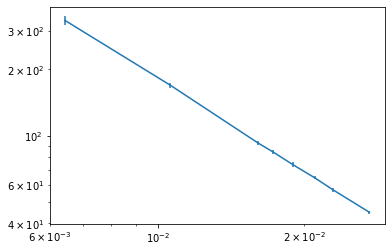

In [11]:
plt.errorbar(reducedMasses, m2, m2Err)
plt.xscale("log")
plt.yscale("log")

I follow Engels to fit. I checked that an unconstrained fit, with subleading corrections, gives the correct critical exponent.

In [12]:
omega = 0.8
nu = 0.7377
gamma = 1.4531

In [13]:
    scaling = lambda x, par : par[0] * x**(-gamma) *(1.0 + par[1] * x**(omega * nu) )


    chi2 = lambda par : np.sum(np.square((m2 - scaling(reducedMasses, par)) / m2Err ))
    fit = Minuit(chi2, [1.0, -1], name=["C+", "C1+"])

    fit.errordef = Minuit.LEAST_SQUARES

    #fit.limits = []

    fit.migrad()
    fit.minos();

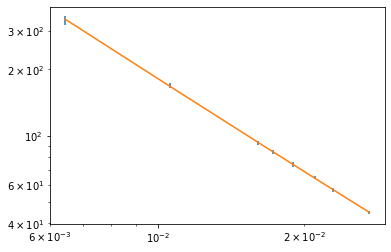

In [14]:
plt.errorbar(reducedMasses, m2, m2Err, ls='none')

plt.plot(reducedMasses, scaling(reducedMasses, np.asarray(fit.values)))


plt.xscale("log")
plt.yscale("log")

In [15]:
fit

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 0.5389                     │              Nfcn = 157              │
│ EDM = 4.06e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ C+   │   0.209   │   0.011   │   -0.011   │   0.011    │         │         │       │
│ 1 │ C1+  │    1.2    │    0.6    │    -0.6    │    0.6     │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────┬───────────────────────┐
│          │          C+           │          C1+          │
├──────────┼───────────┬───────────┼───────────┬───────────┤
│  Error   │  -0.011   │   0.011   │   -0.6    │    0.6    │
│  Valid   │   True    │   True    │   True    │   True    │
│ At Limit │   False   │   False   │   False   │   False   │
│ Max FCN  │   False   │   False   │   False   │   False   │
│ New Min  │   False   │   False   │   False   │   False   │
└──────────┴───────────┴───────────┴───────────┴───────────┘
┌─────┬───────────────────┐
│     │       C+      C1+ │
├─────┼───────────────────┤
│  C+ │  0.00012 -0.00636 │
│ C1+ │ -0.00636    0.346 │
└─────┴───────────────────┘

Note that the subleading correction is crucial, otherwise get a $\chi^2 > 5$.